## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data_without_nones = data.dropna()
data_without_nones = data_without_nones[data_without_nones['Sex'] != '.']
data_without_nones = pd.get_dummies(data_without_nones, columns=['Island', 'Clutch Completion', 'Sex'])
data_without_nones

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,Chinstrap,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,False,True,False,True
1,Chinstrap,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,False,True,False,False,True,True,False
2,Gentoo,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,False,False,True,True,False
3,Chinstrap,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,False,True,False,False,True,True,False
4,Gentoo,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,False,True,False,False,True,True,False
340,Adelie,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,False,True,False,True,False,True
341,Adelie,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False,False,False,True,True,False
342,Gentoo,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,True,False,False,False,True,True,False


**В данных были пропущенные значения, я их удалил. В наборе есть категориальные признаки - Island, Clutch Completion, Sex. Я закодировал их с помощью One-hot-encoding, так как таким способом удобно закодировать категориальные признаки с маленьким количеством уникальных значений.**

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [4]:
species_dict = {'Chinstrap' : 0, 'Gentoo' : 1, 'Adelie' : 2}
data_without_nones['Species'] = data_without_nones['Species'].replace(species_dict)
x = data_without_nones.drop('Species', axis=1)
y = data_without_nones['Species']
x

<ipython-input-4-24699d895e0d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_without_nones['Species'] = data_without_nones['Species'].replace(species_dict)


,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,False,True,False,True
1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,False,True,False,False,True,True,False
2,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,False,False,True,True,False
3,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,False,True,False,False,True,True,False
4,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,False,True,False,False,True,True,False
340,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,False,True,False,True,False,True
341,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False,False,False,True,True,False
342,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,True,False,False,False,True,True,False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

**важно применить stratifiy, потому что это позволяет сохранить пропорции классов в тренировочной и тестовой выборках. Это позволит модели обучиться правильно.**

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

necessary_signs = ['Flipper Length (mm)', 'Body Mass (g)']
x_train_necessary_signs = x_train[necessary_signs]
x_test_necessary_signs = x_test[necessary_signs]

scaler = StandardScaler()
x_train_necessary_signs_scaled = scaler.fit_transform(x_train_necessary_signs)
x_test_necessary_signs_scaled = scaler.transform(x_test_necessary_signs)

trained_models = []
k_values = [1, 3, 5, 10, 15, 25]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  knn.fit(x_train_necessary_signs_scaled, y_train)
  trained_models.append(knn)
  y_train_prediction = knn.predict(x_train_necessary_signs_scaled)
  y_test_prediction = knn.predict(x_test_necessary_signs_scaled)

  train_accuracy = accuracy_score(y_train, y_train_prediction)
  test_accuracy = accuracy_score(y_test, y_test_prediction)

  print(f"kNN с {k} соседями:")
  print(f"Доля правильных ответов на тренировочной выборке: {train_accuracy:.2f}")
  print(f"Доля правильных ответов на тестовой выборке: {test_accuracy:.2f}")
  print()

kNN с 1 соседями:
Доля правильных ответов на тренировочной выборке: 0.96
Доля правильных ответов на тестовой выборке: 0.81

kNN с 3 соседями:
Доля правильных ответов на тренировочной выборке: 0.86
Доля правильных ответов на тестовой выборке: 0.80

kNN с 5 соседями:
Доля правильных ответов на тренировочной выборке: 0.85
Доля правильных ответов на тестовой выборке: 0.82

kNN с 10 соседями:
Доля правильных ответов на тренировочной выборке: 0.80
Доля правильных ответов на тестовой выборке: 0.84

kNN с 15 соседями:
Доля правильных ответов на тренировочной выборке: 0.81
Доля правильных ответов на тестовой выборке: 0.83

kNN с 25 соседями:
Доля правильных ответов на тренировочной выборке: 0.80
Доля правильных ответов на тестовой выборке: 0.86



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

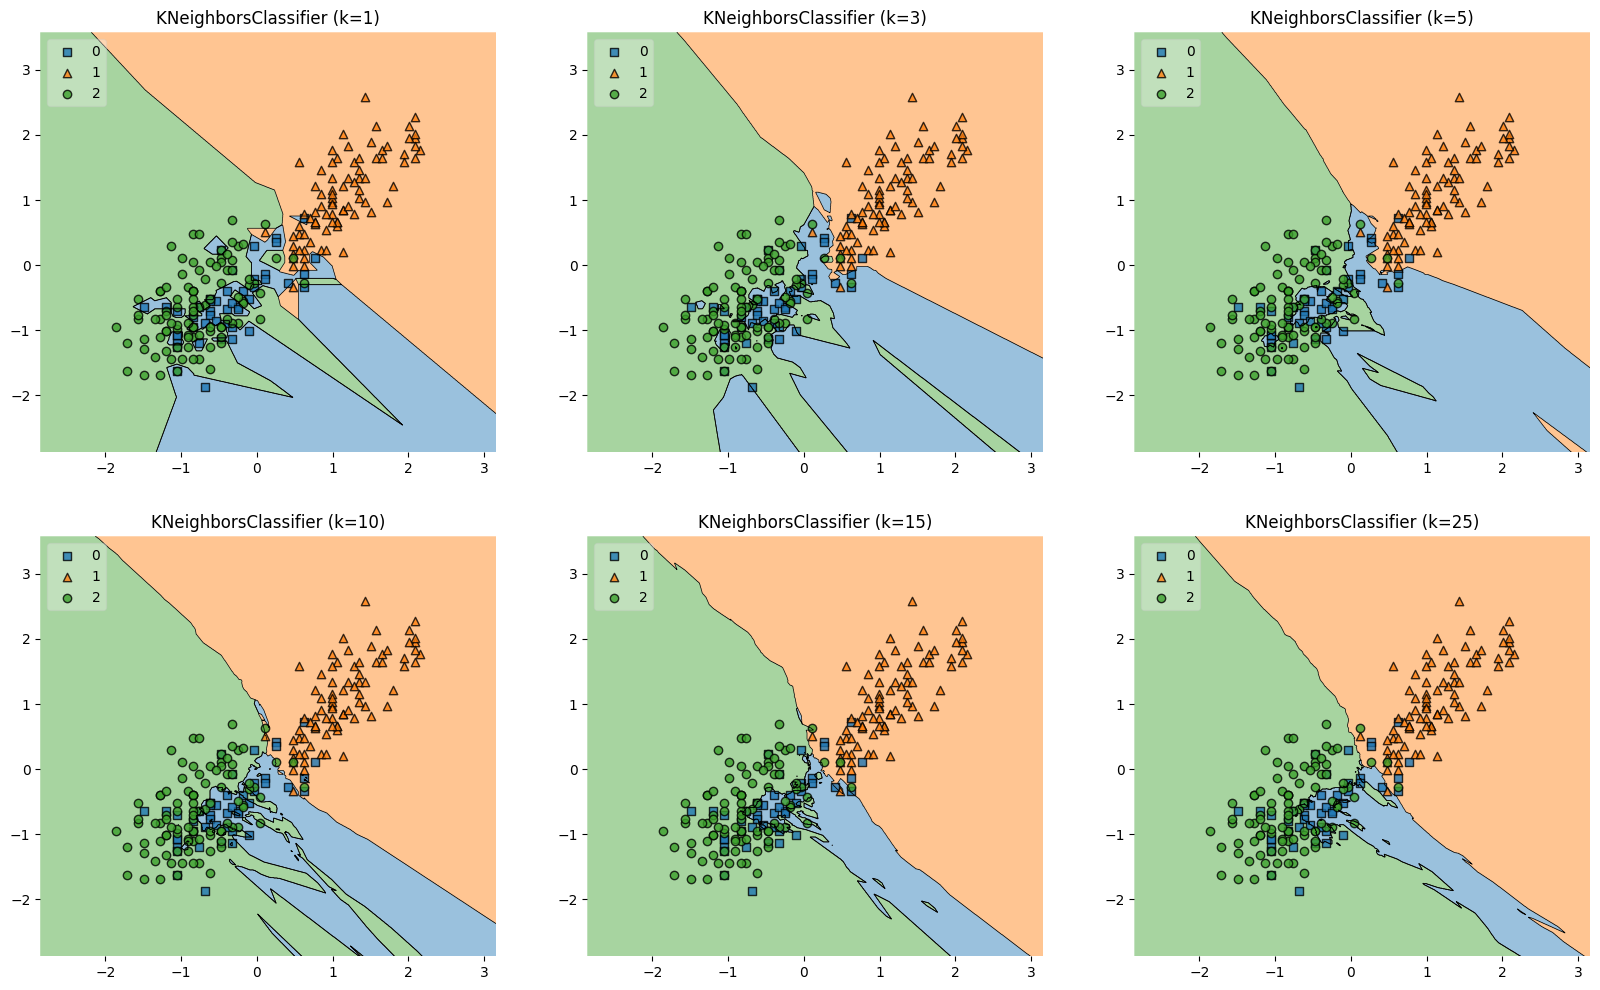

In [9]:
# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,12))

labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)',
          'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']
for clf, lab, grd in zip(trained_models, labels, itertools.product(range(2), range(3))):
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=x_train_necessary_signs_scaled, y=y_train.to_numpy(), clf=clf, legend=2)
  plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

k = 1: разница между точностью на train(0,96) и test(0,81) = 0.15 - это много. На графике видно, что модель подстраивается под локальные точки. Это указывает на переобучение модели.

k = 3: разница между точностью на train(0,86) и test(0,80) = 0.06 - тоже много. На графике видно, что модель подстраивается под локальные точки. Не так сильно как прошлое, но всё-таки тоже указывает на переобучение.

k = 5: разница между точностью на train(0,85) и test(0,82) = 0.03 - приемлемый результат, но я бы не стал его использовать,
так как в задании 1.5 вижу, что при таком количестве соседей моя модель всё еще подстраивается под локальные точки и имеет очень размытые границы.

**k = 10: разница между точностью на train(0,80) и test(0,84) = -0.04 - приемлемый результат - оптимально использовать, из задания 1.5
видно, насколько более "гладкими стали границы" по сравнению с k=5.**

**k = 15: разница между точностью на train(0,81) и test(0,83) = -0.02 - приемлемый результат - оптимально использовать, то же самое, что
и в k=10**.

k = 25: разница между точностью на train(0,80) и test(0,86) = -0.06 - много. В этом случае вообще как будто модель недообучена.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

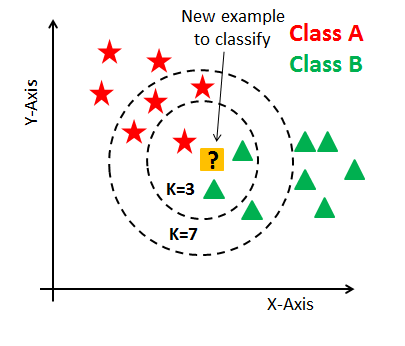

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [10]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

      # YOUR CODE HERE
      # (⌒_⌒;)
      self.X_train = np.array(X)
      self.y_train = np.array(y)

      #pass

    def predict(self, X):

      # YOUR CODE HERE
      # (＠_＠)
      X = np.array(X)
      predictions = []

      for x in X:
        distances = np.linalg.norm(self.X_train - x, axis=1)

        # Индексы k ближайших соседей
        k_nearest_indices = np.argsort(distances)[:self.k]

        # Метки этих соседей
        k_nearest_labels = self.y_train[k_nearest_indices]

        # Самый частый класс среди соседей
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)

      return np.array(predictions)

      #pass

    def count_distance(self, x, y):

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ
      dist = np.linalg.norm(x-y)
      return dist

      #pass

In [11]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [12]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k_values = [1, 3, 5, 10, 15, 25]
test_accuracy_values = []
for k in k_values:
    knn = KNN(k=k)
    knn.fit(x_train_scaled, y_train)

    y_train_prediction = knn.predict(x_train_scaled)
    y_test_prediction = knn.predict(x_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_prediction)
    test_accuracy = accuracy_score(y_test, y_test_prediction)

    test_accuracy_values.append(test_accuracy)

    best_test_accuracy, best_index = max(test_accuracy_values), np.argmax(test_accuracy_values)
    best_k = k_values[best_index]
print(f"лучшее k: {best_k} с точностью {best_test_accuracy:.4f} на test")

лучшее k: 5 с точностью 0.9898 на test


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [14]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [15]:
data.isnull().sum()
data = data.drop(columns=['Unnamed: 0'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**В наборе данных нет пропущенных значений. Я удалил столбец 'Unnamed: 0', так как он просто выполняет роль счетчика, хотя у нас уже есть такой столбец по умолчанию.**

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [16]:
data_corr_matrix = data.corr(numeric_only=True)
print(data_corr_matrix)
print()
target_correlations = data_corr_matrix['price'].sort_values(ascending=False)[1:]
print('вещественные признаки в порядке уменьшения корреляции с целевой переменной: \n')
print(target_correlations)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

вещественные признаки в порядке уменьшения корреляции с целевой переменной: 

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Вещественные признаки 'carat', 'x', 'y', 'z' имеют сильную корреляцию с целевой переменной. Признаки в порядке уменьшения корреляции с целевой переменной: carat, x, y, z, table, depth.

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [17]:
data_with_dummies = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data_with_dummies

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [28]:
x = data_with_dummies.drop('price', axis=1)
y = data_with_dummies['price']
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(3)
y_bins = pd.qcut(y, q=5, labels=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y_bins, random_state=52)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Теперь все признаки имеют одинаковый масштаб. Это значит, что теперь, взяв любую пару признаков, мы можем легко понять, какой из них имеет большее влияние на целевую переменную.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train_scaled, y_train)

y_train_prediction = lin_reg_model.predict(x_train_scaled)
y_test_prediction = lin_reg_model.predict(x_test_scaled)

mse_train = mean_squared_error(y_train, y_train_prediction)
mse_test = mean_squared_error(y_test, y_test_prediction)

print(f"MSE на тренировочной выборке: {mse_train:.2f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")

MSE на тренировочной выборке: 1279063.70
MSE на тестовой выборке: 1272888.94


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [48]:
# Получаем названия признаков (если X_train - DataFrame)
feature_names = x_train.columns.tolist()

# Создаем DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': lin_reg_model.coef_
})

# Добавляем свободный член через concat
intercept_row = pd.DataFrame({
    'Признак': ['INTERCEPT'],
    'Коэффициент': [lin_reg_model.intercept_]
})

coef_df = pd.concat([coef_df, intercept_row], ignore_index=True)

# Сортировка по абсолютному значению коэффициентов
coef_df = coef_df.reindex(
    coef_df['Коэффициент'].abs().sort_values(ascending=False).index
)

# 4. Вычисляем абсолютные значения коэффициентов
abs_coef = np.abs(lin_reg_model.coef_)

# 5. Находим порог (среднее значение коэффициентов * 10)
threshold = np.mean(abs_coef) * 10

# 6. Выбираем доминирующие признаки (исключая intercept)
dominant_features = [
    (name, coef)
    for name, coef in zip(feature_names, lin_reg_model.coef_)
    if abs(coef) > threshold
]

# 7. Выводим результаты
print(coef_df.reindex(coef_df['Коэффициент'].abs().sort_values(ascending=False).index))
print()
print("вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:")
for name, coef in dominant_features:
    print(name)

          Признак  Коэффициент
0           carat  5351.710922
26      INTERCEPT  3933.068171
3               x -1222.174398
21    clarity_SI2  -483.279684
18     clarity_I1  -482.175829
17        color_J  -384.231034
25   clarity_VVS2   273.726379
24   clarity_VVS1   251.385957
16        color_I  -247.099580
19     clarity_IF   231.565387
11        color_D   204.550059
22    clarity_VS1   204.122726
12        color_E   162.989816
20    clarity_SI1  -146.795869
13        color_F   133.968501
6        cut_Fair  -129.633061
15        color_H  -126.151102
23    clarity_VS2   103.327148
1           depth   -92.652241
4               y    72.354096
2           table   -61.827127
14        color_G    55.984009
8       cut_Ideal    48.070421
7        cut_Good   -35.837857
9     cut_Premium    22.656150
5               z   -21.090872
10  cut_Very Good    -1.754551

вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:
carat


**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [57]:
from sklearn.linear_model import Lasso, Ridge

lasso_reg = Lasso(alpha=10).fit(x_train_scaled, y_train)
ridge_reg = Ridge(alpha=10).fit(x_train_scaled, y_train)

coef_comparison = pd.DataFrame({
    'Признак': feature_names,
    'Исходная': lin_reg_model.coef_,
    'Lasso': lasso_reg.coef_,
    'Ridge': ridge_reg.coef_
})

coef_comparison = pd.concat([
    coef_comparison,
    pd.DataFrame({
        'Признак': ['INTERCEPT'],
        'Исходная': [lin_reg_model.intercept_],
        'Lasso': [lasso_reg.intercept_],
        'Ridge': [ridge_reg.intercept_]
    })
], ignore_index=True)

coef_comparison['delta Lasso'] = (coef_comparison['Lasso'] - coef_comparison['Исходная']).abs()
coef_comparison['delta Ridge'] = (coef_comparison['Ridge'] - coef_comparison['Исходная']).abs()
print(coef_comparison[['Признак', 'delta Lasso', 'delta Ridge']].to_string(index=False))

lasso_reg_zero_coef = sum(lasso_reg.coef_ == 0)
print()
print(f"Число обнуленных признаков в Lasso: {lasso_reg_zero_coef}")
print(f"Максимальное изменение весов в Ridge: {coef_comparison['delta Ridge'].max():.4f}")

      Признак  delta Lasso  delta Ridge
        carat 4.577646e+02    37.245878
        depth 3.135029e+01     2.499629
        table 1.291511e+01     0.194987
            x 5.196853e+02    55.300751
            y 7.235410e+01    14.653297
            z 1.046881e+01     4.463195
     cut_Fair 3.119399e+00     0.249665
     cut_Good 3.462164e+00     0.034050
    cut_Ideal 1.427527e+01     0.005186
  cut_Premium 2.265615e+01     0.175955
cut_Very Good 2.515845e+00     0.305681
      color_D 6.288215e+01     0.243949
      color_E 6.977480e+01     0.239236
      color_F 6.953003e+01     0.431352
      color_G 5.598401e+01     0.256521
      color_H 4.171601e+01     0.244958
      color_I 2.770136e+01     0.639860
      color_J 1.535124e+01     0.731064
   clarity_I1 1.606751e+01     0.489915
   clarity_IF 5.079775e+01     0.370003
  clarity_SI1 1.063653e+02     0.527239
  clarity_SI2 8.287514e+01     0.120964
  clarity_VS1 1.012584e+02     0.178980
  clarity_VS2 1.033271e+02     0.172513


Число обнуленных признаков в Lasso: 4. Это говорит о том, что у нас была большая избыточность в данных.
Максимальное изменение весов в Ridge: 55.3008. Довольно много, это говорит о том, что модель переоценивала какие-то признаки.
В итоге мы понимаем, что у нашей исходной модели были большие проблемы с мультиколлинеарностью

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.535e+08, tolerance: 6.023e+07
  model = cd_fast.enet_coordinate_descent(


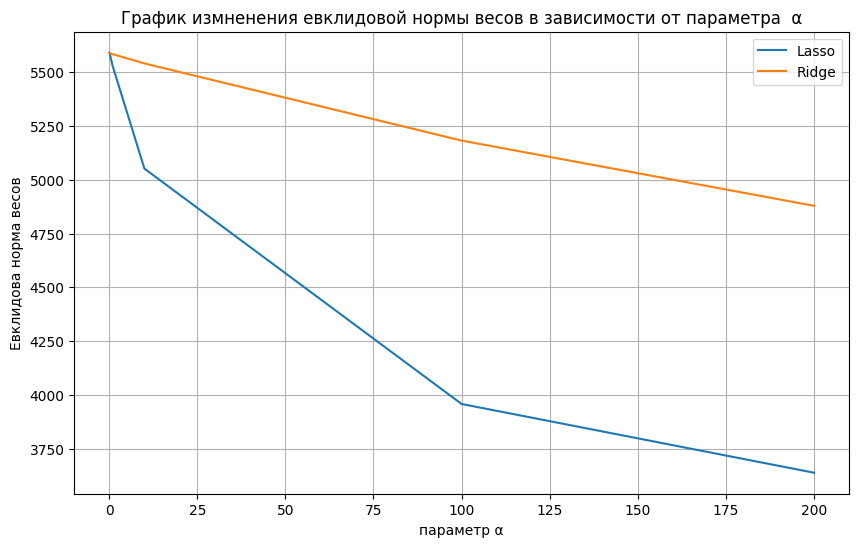

In [63]:
import matplotlib.pyplot as plt

alpha_values = [0.1, 1, 10, 100, 200]
lasso_reg_norms = []
ridge_reg_norms = []

for alpha in alpha_values:
    # Lasso регрессия
    lasso_reg = Lasso(alpha=alpha).fit(x_train_scaled, y_train)
    lasso_reg_norms.append(np.linalg.norm(lasso_reg.coef_))

    # Ridge регрессия
    ridge_reg = Ridge(alpha=alpha).fit(x_train_scaled, y_train)
    ridge_reg_norms.append(np.linalg.norm(ridge_reg.coef_))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_reg_norms, label='Lasso')
plt.plot(alpha_values, ridge_reg_norms, label='Ridge')
plt.xlabel('параметр α')
plt.ylabel('Евклидова норма весов')
plt.title('График измненения евклидовой нормы весов в зависимости от параметра  α')
plt.legend()
plt.grid(True)
plt.show()

По графику видно, что метод Лассо-регрессии сильнее снижает норму коэффициентов. Его часто используют, потому что эта модель автоматически выбирает наиболее важные признаки.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.